In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
cv2.__version__

'4.7.0'

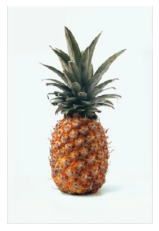

In [2]:
#import image
img = cv2.imread('pineapple.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert to RGB
plt.axis('off')
plt.imshow(img)

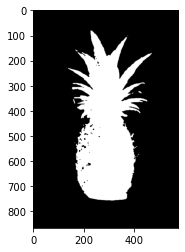

In [3]:
# Contour detection requires conversion to grayscale and thresholding
img_blur = cv2.bilateralFilter(img, d = 7, 
                               sigmaSpace = 75, sigmaColor =75)

img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)

a = img_gray.max()  
_, thresh = cv2.threshold(img_gray, a/2+60, a,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

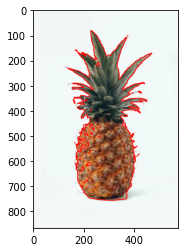

In [4]:
# Contour detection
# mode cv2.RETR_TREE finds all promising contour lines and reconstructs a hierarchy of nested colors
# method cv2.CHAIN_APPROX_SIMPLE returns the endpoints necessary for drawing the contour line
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Draw the contour
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx=-1, color=(255,0,0),thickness=2)

plt.imshow(img_copy)

In [5]:
# Contour can also be used to find centroid of an image or area of a boundary field using a *image moment*
# Image moment is how image pixel intensities are distributed according to thei rlocation
# 3 types of moments: spatial, central, and normalized central

# the first order of the contours
c_0 = contours[0]

# image moment
M = cv2.moments(c_0)
print(M.keys())

dict_keys(['m00', 'm10', 'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11', 'mu02', 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30', 'nu21', 'nu12', 'nu03'])


In [6]:
# Area of contours
print("1st Contour Area : ", cv2.contourArea(contours[0]))
print("2nd Contour Area : ", cv2.contourArea(contours[1]))
print("3rd Contour Area : ", cv2.contourArea(contours[2]))
# Arc length of contours
print("1st Contour Arc Length", cv2.arcLength(contours[0], closed=True))
print("2nd Contour Arc Length", cv2.arcLength(contours[1], closed=True))

1st Contour Area :  114010.0
2nd Contour Area :  138.5
3rd Contour Area :  113.5
1st Contour Arc Length 4026.3842293024063
2nd Contour Arc Length 56.041630148887634


In [7]:
# the centroid point
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

# extrema - endpoints on left and right and top and bottom
l_m = tuple(c_0[c_0[:, :, 0].argmin()][0])
r_m = tuple(c_0[c_0[:, :, 0].argmax()][0])
t_m = tuple(c_0[c_0[:, :, 1].argmin()][0])
b_m = tuple(c_0[c_0[:, :, 1].argmax()][0])
pst = [l_m, r_m, t_m, b_m]
xcor = [p[0] for p in pst]
ycor = [p[1] for p in pst]

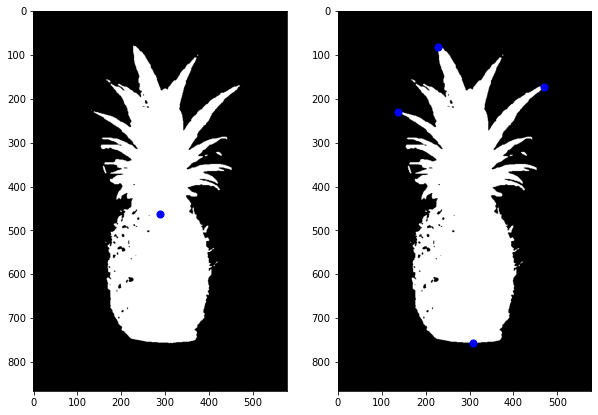

In [8]:
# plotting the centroid and extreme points of pineapple
plt.figure(figsize=(10,16))
plt.subplot(1,2,1)
plt.imshow(thresh, cmap='gray')
plt.scatter([cx], [cy], c = 'b', s = 50)

plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap = 'gray')
plt.scatter(xcor, ycor, c = 'b', s = 50)

In [9]:
# draw rectangle around object
c_0 = contours[0]
# get the 4 points of the bounding rectangle
x, y, w, h = cv2.boundingRect(c_0)

img_copy = img.copy()
img_box = cv2.rectangle(img_copy, (x,y), (x+w,y+h),color=(255,0,0),thickness=2)

In [10]:
# Get the 4 points of the bounding rectangle with the minimum area
rect = cv2.minAreaRect(c_0)
box = cv2.boxPoints(rect)
box = box.astype('int')

img_copy = img.copy()
img_box_2 = cv2.drawContours(img_copy, contours = [box], contourIdx = -1, color=(255,0,0), thickness=2)

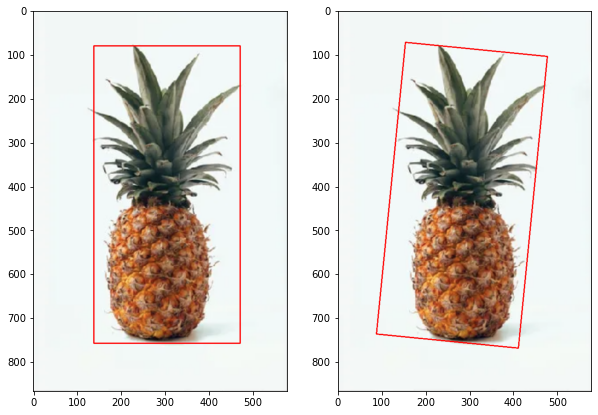

In [11]:
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1); plt.imshow(img_box)
plt.subplot(1, 2, 2); plt.imshow(img_box_2) # min area

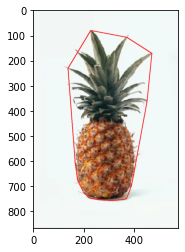

In [12]:
# Detect the convex contour
hull = cv2.convexHull(c_0)

img_copy = img.copy()
img_hull = cv2.drawContours(img_copy, contours=[hull], contourIdx = 0, color=(255,0,0), thickness=2)

plt.imshow(img_hull)

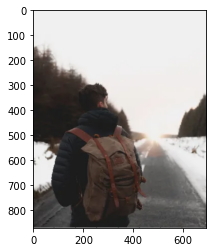

In [29]:
# Image masking
backpacker = cv2.imread('backpacker.jpeg')
backpacker = cv2.cvtColor(backpacker, cv2.COLOR_BGR2RGB)
plt.imshow(backpacker)

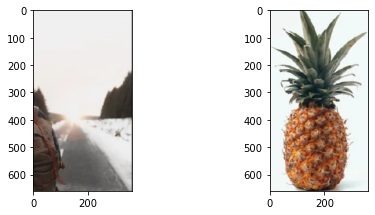

In [30]:
# Crop the small image and the roi
roi = backpacker[112:772, 334:]
img_2 = img[90:750, 120:480]

# plt.figure(figsize = (6, 6))
plt.subplot(1, 3, 1); plt.imshow(roi)
plt.subplot(1, 3, 3); plt.imshow(img_2)

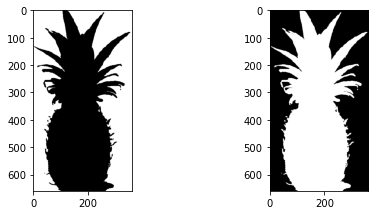

In [31]:
# Making the mask for each image
# Implement bitwise operation to create binary image

# Creating the mask for the roi and small image
img_gray = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(img_gray, 254/2+100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

plt.figure(figsize=(6,6))
plt.subplot(1,3,1); plt.imshow(mask, cmap='gray')
plt.subplot(1,3,3); plt.imshow(mask_inv, cmap='gray')

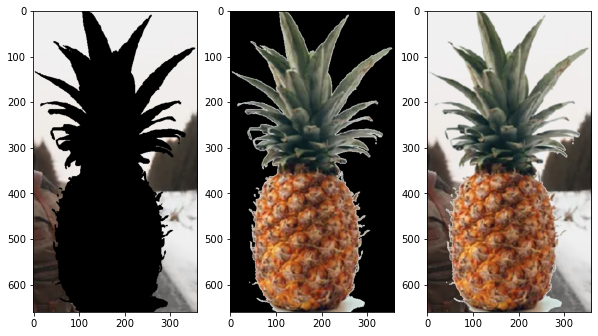

In [32]:
# implementing bitwise_and function will pass only white area of image
# first mask applied to roi image to set the background
# second mask applied to img_2 to make foregorund image witht the fruit

# Masking
img_bg = cv2.bitwise_and(roi, roi, mask=mask) # when adding an image's mask to another image's roi, they must be same size (roi and mask)
img_fg = cv2.bitwise_and(img_2,img_2, mask=mask_inv)
dst=cv2.add(img_fg,img_bg)

plt.figure(figsize = (10, 6))
plt.subplot(1, 3, 1); plt.imshow(img_bg)
plt.subplot(1, 3, 2); plt.imshow(img_fg)
plt.subplot(1, 3, 3); plt.imshow(dst)

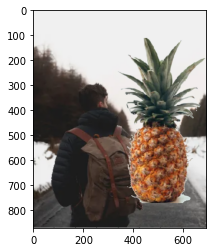

In [33]:
# Final output
backpacker[112:772, 334:] = dst
plt.imshow(backpacker)

In [18]:
d = backpacker.shape
print(d)

(872, 694, 3)
